# Prerequisites
Importing all the necessary libraries, setting `seaborn` theme, and reading the data

In [1]:
from collections import Counter
from functools import reduce
import math
import random

import numpy as np  # for self-check purposes only
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [2]:
sns.set_theme()

In [3]:
with (open('set_1.csv', 'r') as f1, 
      open('set_2.csv', 'r') as f2, 
      open('set_3.csv', 'r') as f3):
          
    df1, df2, df3 = map(lambda s: list(map(float, s.split(','))), [f1.read(), f2.read(), f3.read()])

# Defining `mean` and `std` functions

## Mean
Implementing `mean` function in Python means dealing with discrete data samples stored in different iterables like `list`, `tuple`, `set`, etc. It means that the summation formula will be in use:
$$
    \mathbb{E}[X] = \sum_{i}^{N}{x_iP(x_i)}.
$$
To calculate $P(x_i)$ I use Python's `collections.Counter` and divide each of its values by the total length of the data.

In [4]:
def mean(data: list[float | int]) -> float:
    """Function for calculating mean value of the dataset.

    :param data: list of any numbers.
    :return: floating point number that represents mean value of the dataset.
    """
    counter: Counter = Counter(data)
    mean: float = sum([k * v / len(data) for k, v in counter.items()])
    
    return mean

## Standard deviation
Variance can actually be computed in several ways, like:
$$
    \operatorname{Var}(X) = \mathbb{E}\left[(X - \mathbb{E}[X])^2\right]
$$
or:
$$
    \operatorname{Var}(X) = \mathbb{E}\left[X^2\right] - \mathbb{E}\left[X\right]^2,
$$
which is derived from the first formula.
But naive formula implementation would require a redundant variable to store $\mathbb{E}[X]$, so I've decided to go with the second variant. To get standard deviation, I just square root the variance: $\sigma(X) = \sqrt{\operatorname{Var}(X)} = \sqrt{\mathbb{E}\left[X^2\right] - \mathbb{E}\left[X\right]^2}$.

In [5]:
def std(data: list[float | int]) -> float:
    r"""Computes standard deviation of the given dataset.

    :param data: list of any numbers.
    :return: floating point number that represents standard deviation of the dataset.
    """
    std: float = math.sqrt(mean([s ** 2 for s in data]) - mean(data) ** 2)

    return std

## Carrying out simple tests to verify that `mean` and `std` functions work

In [6]:
assert np.allclose(mean(df1), np.mean(np.array(df1)))
assert np.allclose(mean(df2), np.mean(np.array(df2)))
assert np.allclose(mean(df3), np.mean(np.array(df3)))

assert np.allclose(std(df1), np.std(np.array(df1)))
assert np.allclose(std(df2), np.std(np.array(df2)))
assert np.allclose(std(df3), np.std(np.array(df3)))

# Plotting the datasets

In [7]:
def remove_outliers(data: list[int | float]) -> list[int | float]:
    sigma: float = std(data)

    return list(filter(lambda x: -3 * sigma < x and x < 3 * sigma, data))

In [8]:
df1, df2, df3 = map(remove_outliers, [df1, df2, df3])

In [9]:
def nunique(data):
    return len(Counter(data))

AttributeError: Rectangle.set() got an unexpected keyword argument 'hist_kws'

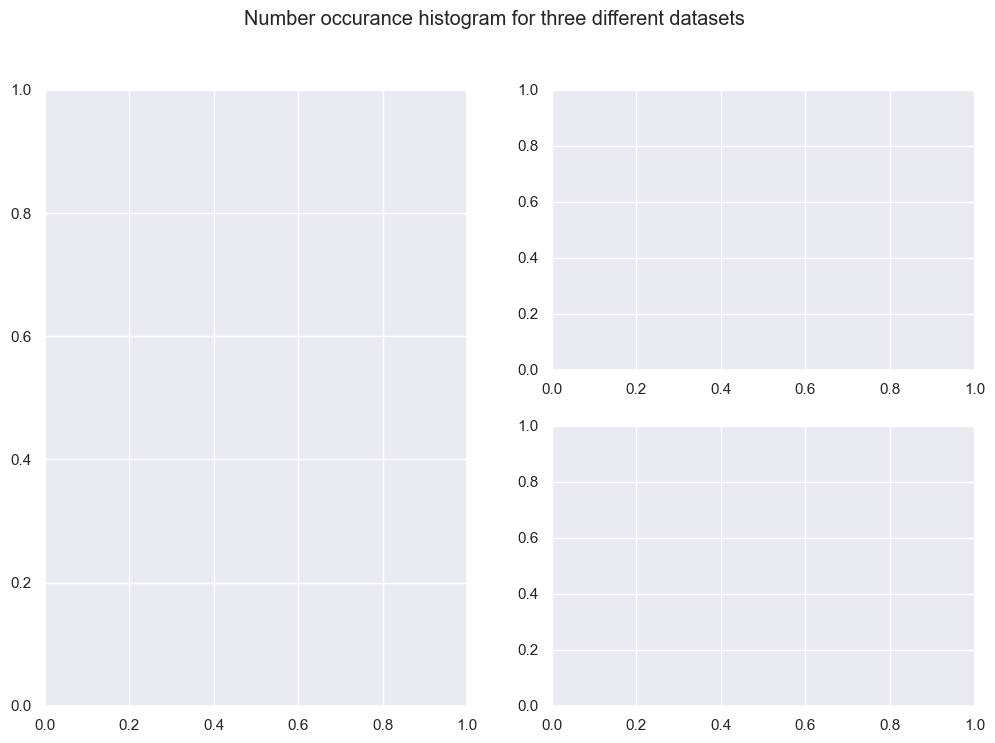

In [26]:
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(nrows=2, ncols=2)

ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 1])
ax3 = fig.add_subplot(gs[:, 0])

plt.suptitle('Number occurance histogram for three different datasets')

for i, (ax, df) in enumerate(zip([ax1, ax2, ax3], [df1, df2, df3])):    
    n_bins: int = 50
    sns.histplot(df, bins=n_bins, hist_kws={"rwidth": 10}, kde=(df is not df1), ax=ax)
    ax.set_xlabel('Number')
    ax.set_ylabel('Number count')
    ax.set_title(f'Historgam for dataset #{i + 1}')

plt.tight_layout(pad=1)
plt.show()

# Implementing theoretical data distributions in Python

## Normal distribution

In [32]:
def normal(mean: float, std: float, n: int) -> list[float]:
    return [random.normalvariate(mean, std) for _ in range(n)]

## Geometric

In [33]:
def geometric(mean: float, std: float, n: int) -> list[int]:
    while mean < 1:
        mean *= 10
        
    data: list[int] = []
    p = 1 / mean
    
    for _ in range(n):
        i = 0
        while random.choices([True, False], weights=[p, 1-p])[0]:
            i += 1
        data += [i]
    
    return data

## Poisson

In [34]:
def poisson(mean: float, n: int) -> list[float]:
    data: list[float] = []
    
    for _ in range(n):
        k, p = 0, 1
        
        while True:
            if p <= math.exp(-mean):
                break
            p *= random.random()
            k += 1
            
        data += [k]
    
    return data


## Uniform

In [35]:
def uniform(mean: float, std: float, n: int) -> list[float]:
    a = mean - math.sqrt(3) * std
    b = mean + math.sqrt(3) * std

    data = [random.uniform(a, b) for _ in range(n)]

    return data

## Binomial

In [36]:
def binomial(mean: float, std: float, n: int) -> list[int]:
    while std < 1:
        std *= 10
        
    data: list[int] = []
    p = 1 / (std ** 2)
    k = int((std ** 2) / mean)
    
    data = [sum(random.choices([0, 1], weights=[p, 1-p], k=k)) for _ in range(n)]
    
    return data

## Exponential

In [37]:
def exponential(mean: float, n: int) -> list[float]:
    return [random.expovariate(1 / mean) for _ in range(n)]

# Calculating $\mu$ and $\sigma$ for each dataset and generating new distributions

In [53]:
mu_vals = list(map(mean, [df1, df2, df3]))
sigma_vals = list(map(std, [df1, df2, df3]))
N: int = 10000

In [55]:
distributions = [
    [normal(mu, sigma, N), uniform(mu, sigma, N), poisson(mu, N), 
     geometric(mu, sigma, N), exponential(mu, N), binomial(mu, sigma, N)]
    for i, (mu, sigma) in enumerate(zip(mu_vals, sigma_vals))
]
dist_names = ['Normal', 'Uniform', 'Poisson', 'Geometric', 'Exponential', 'Binomial']

# Plotting new distributions

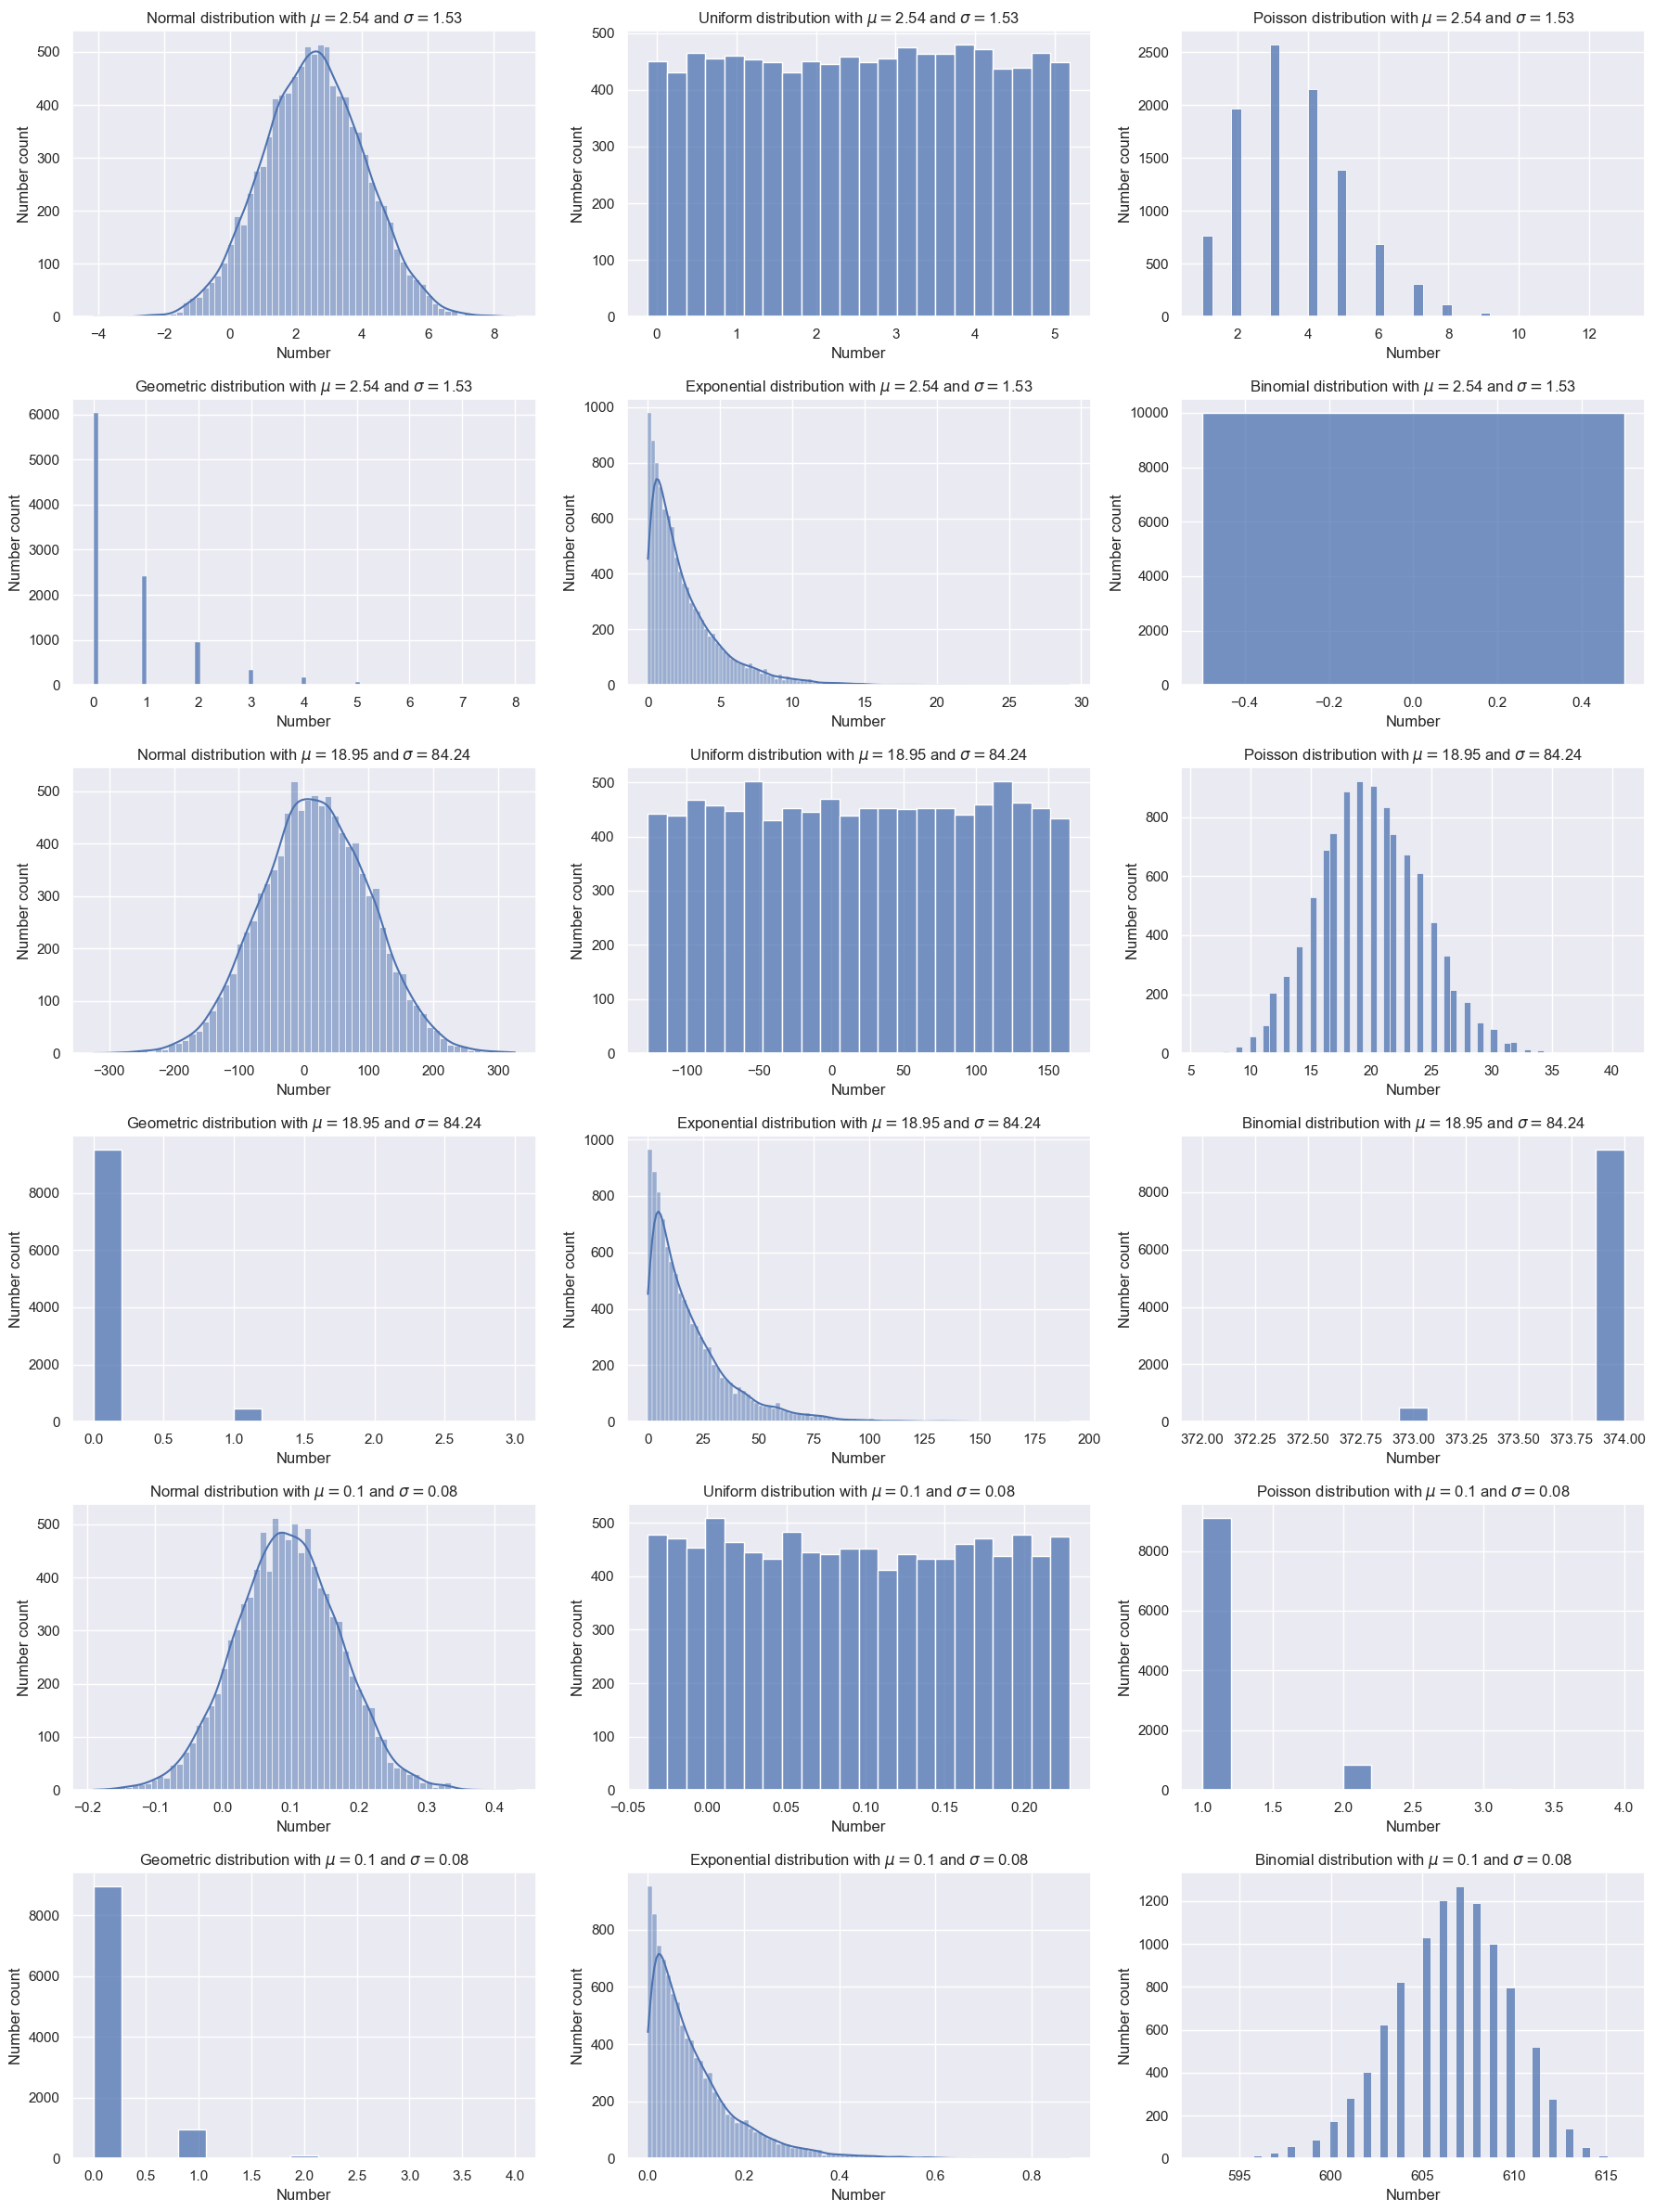

In [57]:
fig = plt.figure(figsize=(18, 24))
gs = fig.add_gridspec(2 * len(distributions), 3)

for i, (dist_set, mu, sigma) in enumerate(zip(distributions, mu_vals, sigma_vals)):
    axes: list = []
    
    for j in range(2):
        for k in range(3):
            axes += [fig.add_subplot(gs[i * 2 + j, k])]

    for dist, name, ax in zip(dist_set, dist_names, axes):
        ax.set_xlabel('Number')
        ax.set_ylabel('Number count')
        ax.set_title(rf'{name} distribution with $\mu=${round(mu, 2)} and $\sigma=${round(sigma, 2)}')
        
        sns.histplot(dist, kde=(name in ['Normal', 'Exponential']), ax=ax)

plt.tight_layout()
plt.show()